# Model/Dataset Train Test

In this notebook an overfit is done to check the capability of our model's architecture to learn a specific output image from a randomized input. 

In [1]:
from model import Model

We first generate the dummy input- and target data.

In [2]:
from PIL import Image
import numpy as np

# image is expected output i.e., target
# in greyscale (first layer is one channel)
image_path = "img/sgs_logo.webp"
out_img = np.array(Image.open(image_path).convert("L"))

# as input we generate a dummy random
# image of the same size (white noise)
in_img = np.random.randint(
    0, 255, out_img.shape, dtype=np.uint8
    )

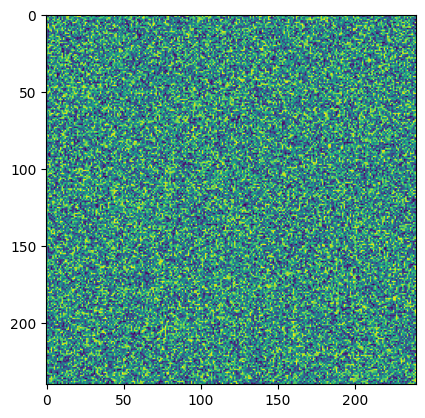

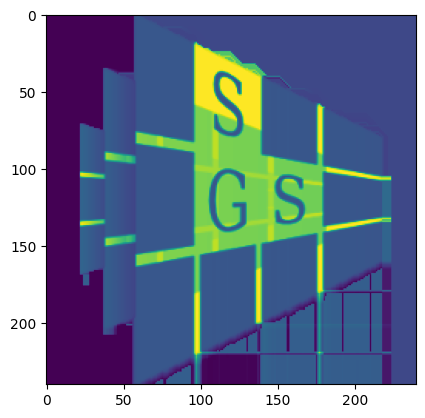

In [3]:
# confirm in and output images are the same size
assert out_img.shape == in_img.shape

# visualize in and output images
import matplotlib.pyplot as plt
plt.imshow(in_img)
plt.show()
plt.imshow(out_img)
plt.show()

We take the dummy data to build the dataloader

In [ ]:
import torch

batch_size = 1
n_in_channels = 1
n_out_channels = 2

# expected shape within the dataloader/train-loop: (batch_size, n_in_channels, height, width)
x = torch.tensor(in_img).reshape(batch_size, n_in_channels, *in_img.shape)
y = torch.tensor(out_img).reshape(batch_size, n_out, *out_img.shape)

# normalize the data
x = x / 255.0
y = y / 255.0

# create tensor dataset and dataloader
train_dataset = torch.utils.data.TensorDataset(x, y)
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=1)


Test the training loop and model setup works

In [5]:
# Model can be instantiated
model = Model()

In [6]:
# Model can be trained
model.fit(train_dataloader, learning_rate=0.001, epochs=4000)

/Users/Rafael/Workspace/ml_flow_sim/venv/lib/python3.8/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([1, 1, 240, 240])) that is different to the input size (torch.Size([1, 2, 240, 240])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 0, Loss: 0.15457859635353088
Epoch 1, Loss: 0.13398872315883636
Epoch 2, Loss: 0.06774090230464935
Epoch 3, Loss: 0.8762267827987671
Epoch 4, Loss: 0.06825217604637146
Epoch 5, Loss: 0.08903468400239944
Epoch 6, Loss: 0.1224820613861084
Epoch 7, Loss: 0.1367514282464981
Epoch 8, Loss: 0.1418292373418808
Epoch 9, Loss: 0.14376547932624817
Epoch 10, Loss: 0.1443769931793213
Epoch 11, Loss: 0.14437851309776306
Epoch 12, Loss: 0.14392633736133575
Epoch 13, Loss: 0.14307314157485962
Epoch 14, Loss: 0.1418239325284958
Epoch 15, Loss: 0.14010100066661835
Epoch 16, Loss: 0.13748286664485931
Epoch 17, Loss: 0.13372467458248138
Epoch 18, Loss: 0.12875989079475403
Epoch 19, Loss: 0.12244036048650742
Epoch 20, Loss: 0.11464685201644897
Epoch 21, Loss: 0.10537455976009369
Epoch 22, Loss: 0.09483189880847931
Epoch 23, Loss: 0.08358162641525269
Epoch 24, Loss: 0.07274117320775986
Epoch 25, Loss: 0.0645565465092659
Epoch 26, Loss: 0.061375055462121964
Epoch 27, Loss: 0.06719662249088287
Epoch 28

In [7]:
model.eval()

Model(
  (conv1): Conv2d(1, 16, kernel_size=(7, 7), stride=(1, 1), padding=same)
  (relu): ReLU()
  (hidden): ModuleList(
    (0-4): 5 x Conv2d(16, 16, kernel_size=(7, 7), stride=(1, 1), padding=same)
  )
  (output_layer): Conv2d(16, 2, kernel_size=(7, 7), stride=(1, 1), padding=same)
)

In [16]:
y_predict = model.forward(x)
y_predict.shape

torch.Size([1, 2, 240, 240])

(2, 240, 240)

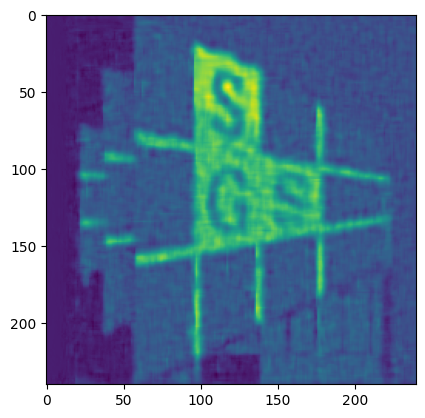

In [26]:
# represent y predict as image and show it
y_predict_img = y_predict.squeeze().detach().numpy()

plt.imshow(y_predict_img[1])